#  Convolutional Neural Network 

In [1]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop

In [2]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

In [3]:
#shape the data 

from tensorflow.keras import backend as K

if K.image_data_format() == 'channels_first':
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 1, 28, 28)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 28, 28, 1)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [4]:
train_labels = tensorflow.keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = tensorflow.keras.utils.to_categorical(mnist_test_labels, 10)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


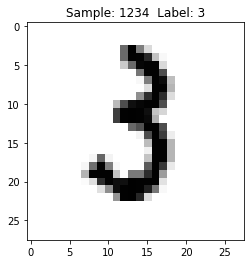

In [5]:
#check images with its label:

import matplotlib.pyplot as plt

def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(train_labels[num])  
    #Print the label converted back to a number
    label = train_labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1234)

Setting up a convolutional neural network involves more layers. 
Start with a 2D convolution of the image 
Then run a second convolution on top of that with 64 3x3 windows 
Next apply a MaxPooling2D layer that takes the maximum of each 2x2 result to distill the results down into something more manageable.
A dropout filter is then applied to prevent overfitting.
Next we flatten the 2D layer into a 1D layer 
Apply dropout again to further prevent overfitting.
Feed that into final 10 units 

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# 64 3x3 kernels
model.add(Conv2D(64, (3, 3), activation='relu'))
# Reduce by taking the max of each 2x2 block
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout to avoid overfitting
model.add(Dropout(0.25))
# Flatten the results to one dimension for passing into our final layer
model.add(Flatten())
# A hidden layer to learn with
model.add(Dense(128, activation='relu'))
# Another dropout
model.add(Dropout(0.5))
# Final categorization from 0-9 with softmax
model.add(Dense(10, activation='softmax'))

In [7]:
#check the model description:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Categorical_crossentropy is the right loss function for  multiple categorization. Use the Adam optimizer.

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
#train model
#timing
import time
start = time.time()
history = model.fit(train_images, train_labels,
                    batch_size=32,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

Epoch 1/10
1875/1875 - 51s - loss: 0.1901 - accuracy: 0.9423 - val_loss: 0.0460 - val_accuracy: 0.9856
Epoch 2/10
1875/1875 - 53s - loss: 0.0804 - accuracy: 0.9761 - val_loss: 0.0368 - val_accuracy: 0.9867
Epoch 3/10
1875/1875 - 53s - loss: 0.0593 - accuracy: 0.9817 - val_loss: 0.0309 - val_accuracy: 0.9892
Epoch 4/10
1875/1875 - 53s - loss: 0.0482 - accuracy: 0.9850 - val_loss: 0.0315 - val_accuracy: 0.9902
Epoch 5/10
1875/1875 - 60s - loss: 0.0427 - accuracy: 0.9871 - val_loss: 0.0313 - val_accuracy: 0.9898
Epoch 6/10
1875/1875 - 53s - loss: 0.0344 - accuracy: 0.9895 - val_loss: 0.0285 - val_accuracy: 0.9916
Epoch 7/10
1875/1875 - 52s - loss: 0.0308 - accuracy: 0.9899 - val_loss: 0.0274 - val_accuracy: 0.9922
Epoch 8/10
1875/1875 - 52s - loss: 0.0289 - accuracy: 0.9907 - val_loss: 0.0271 - val_accuracy: 0.9925
Epoch 9/10
1875/1875 - 52s - loss: 0.0266 - accuracy: 0.9916 - val_loss: 0.0286 - val_accuracy: 0.9915
Epoch 10/10
1875/1875 - 52s - loss: 0.0225 - accuracy: 0.9929 - val_loss:

In [10]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.034049834153382426
Test accuracy: 0.9918
